# German Credit - Dataset Exploration

https://www.apispreadsheets.com/datasets/127

This dataset classifies people described by a set of attributes as good or bad credit risks. The dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix. It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
complete_df = pd.read_csv('german_credit_data_dataset.csv')
attributes_df = pd.read_csv('attributes_german_credit_data.csv')
# x_train, x_test, y_train, y_test = train_test_split(
#     complete_df[complete_df.columns.values[:-1]], # X
#     complete_df[complete_df.columns.values[-1]], # y
#     test_size=0.30, random_state=39)

print(round(complete_df[complete_df['customer_type'] == 2].shape[0]/complete_df.shape[0]*100, 2), '% of bad customers in the dataset')

build_df, validation_df = train_test_split(
    complete_df,
    test_size=0.30, random_state=39)

print(round(build_df[build_df['customer_type'] == 2].shape[0]/build_df.shape[0]*100, 2), '% of bad customers in the building dataset')
print(round(validation_df[validation_df['customer_type'] == 2].shape[0]/validation_df.shape[0]*100, 2), '% of bad customers in the validation dataset')

train_df, test_df = train_test_split(
    build_df,
    test_size=0.30, random_state=39)

print(round(train_df[train_df['customer_type'] == 2].shape[0]/train_df.shape[0]*100, 2), '% of bad customers in the training dataset')
print(round(test_df[test_df['customer_type'] == 2].shape[0]/test_df.shape[0]*100, 2), '% of bad customers in the testing dataset')

30.0 % of bad customers in the dataset
29.57 % of bad customers in the building dataset
31.0 % of bad customers in the validation dataset
29.39 % of bad customers in the training dataset
30.0 % of bad customers in the testing dataset


## Basic dataset info

In [6]:
train_df.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
756,A13,6,A34,A40,1299.0,A61,A73,1.0,A93,A101,...,A121,74.0,A143,A152,3.0,A171,2,A191,A202,1
954,A11,12,A32,A40,1893.0,A61,A73,4.0,A92,A103,...,A122,29.0,A143,A152,1.0,A173,1,A192,A201,1
600,A12,7,A32,A43,2329.0,A61,A72,1.0,A92,A103,...,A121,45.0,A143,A152,1.0,A173,1,A191,A201,1
556,A12,18,A30,A40,2278.0,A62,A72,3.0,A92,A101,...,A123,28.0,A143,A152,2.0,A173,1,A191,A201,2
78,A14,54,A30,A41,9436.0,A65,A73,2.0,A93,A101,...,A122,39.0,A143,A152,1.0,A172,2,A191,A201,1


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 756 to 127
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  490 non-null    object 
 1   duration                 490 non-null    int64  
 2   credit_history           490 non-null    object 
 3   purpose                  490 non-null    object 
 4   credit_amount            490 non-null    float64
 5   savings                  490 non-null    object 
 6   present_employment       490 non-null    object 
 7   installment_rate         490 non-null    float64
 8   personal                 490 non-null    object 
 9   other_debtors            490 non-null    object 
 10  present_residence        490 non-null    float64
 11  property                 490 non-null    object 
 12  age                      490 non-null    float64
 13  other_installment_plans  490 non-null    object 
 14  housing                 

In [8]:
train_df.shape

(490, 21)

In [9]:
train_df.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,20.800000,3316.540816,2.997959,2.840816,34.810204,1.410204,1.148980,1.293878
std,12.406575,2937.234570,1.104923,1.129257,11.094993,0.565810,0.356432,0.456002
min,4.000000,343.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1343.500000,2.000000,2.000000,26.000000,1.000000,1.000000,1.000000
50%,18.000000,2325.500000,3.000000,3.000000,32.000000,1.000000,1.000000,1.000000
75%,24.000000,3947.500000,4.000000,4.000000,40.000000,2.000000,1.000000,2.000000
max,72.000000,15945.000000,4.000000,4.000000,74.000000,4.000000,2.000000,2.000000


In [10]:
pd.set_option('display.max_colwidth', None)
attributes_df

,name,type,description
0,checking_account_status,string,"Status of existing checking account (A11: < 0 DM, A12: 0 <= x < 200 DM, A13 : >= 200 DM / salary assignments for at least 1 year, A14 : no checking account)"
1,duration,integer,Duration in month
2,credit_history,string,"A30: no credits taken/ all credits paid back duly, A31: all credits at this bank paid back duly, A32: existing credits paid back duly till now, A33: delay in paying off in the past, A34 : critical account/ other credits existing (not at this bank)"
3,purpose,string,"Purpose of Credit (A40 : car (new), A41 : car (used), A42 : furniture/equipment, A43 : radio/television, A44 : domestic appliances, A45 : repairs, A46 : education, A47 : (vacation - does not exist?), A48 : retraining, A49 : business, A410 : others)"
4,credit_amount,float,NaN
5,savings,string,"Savings in accounts/bonds (A61 : < 100 DM, A62 : 100 <= x < 500 DM, A63 : 500 <= x < 1000 DM, A64 : >= 1000 DM, A65 : unknown/ no savings account"
6,present_employment,string,"A71 : unemployed, A72 : < 1 year, A73 : 1 <= x < 4 years, A74 : 4 <= x < 7 years, A75 : .. >= 7 years"
7,installment_rate,float,Installment Rate in percentage of disposable income
8,personal,string,"Personal Marital Status and Sex (A91 : male : divorced/separated, A92 : female : divorced/separated/married, A93 : male : single, A94 : male : married/widowed, A95 : female : single)"
9,other_debtors,string,"A101 : none, A102 : co-applicant, A103 : guarantor"


## Distribiution and value counts

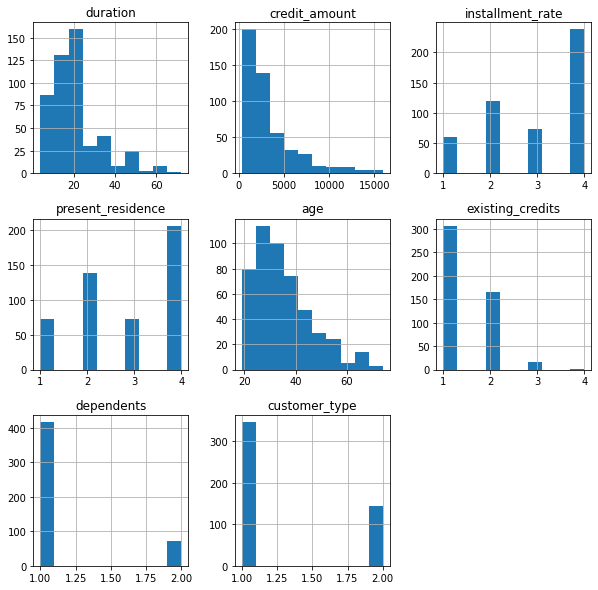

In [11]:
train_df.hist(figsize=(10,10))
plt.show()

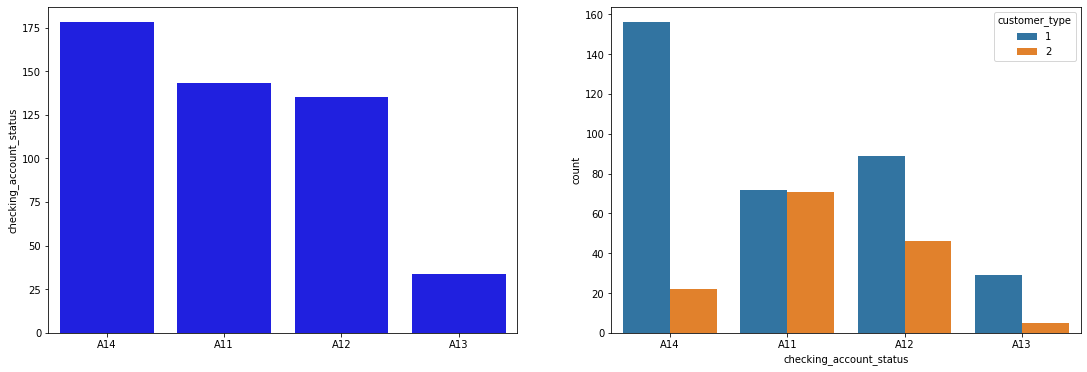

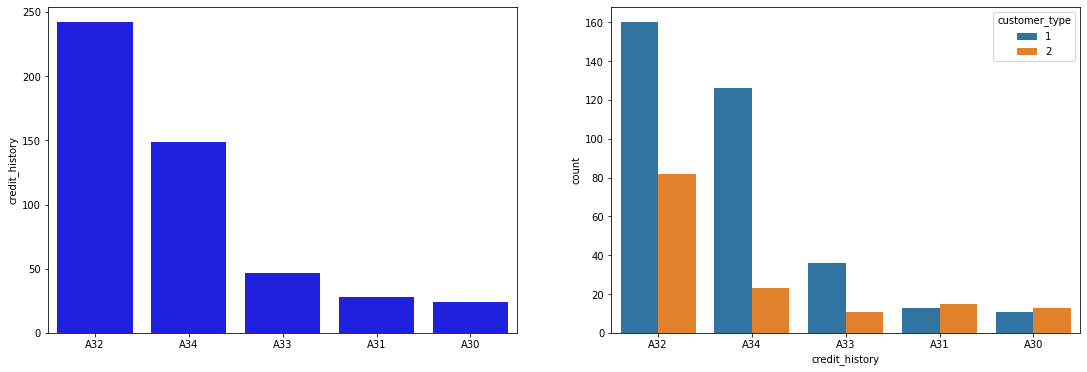

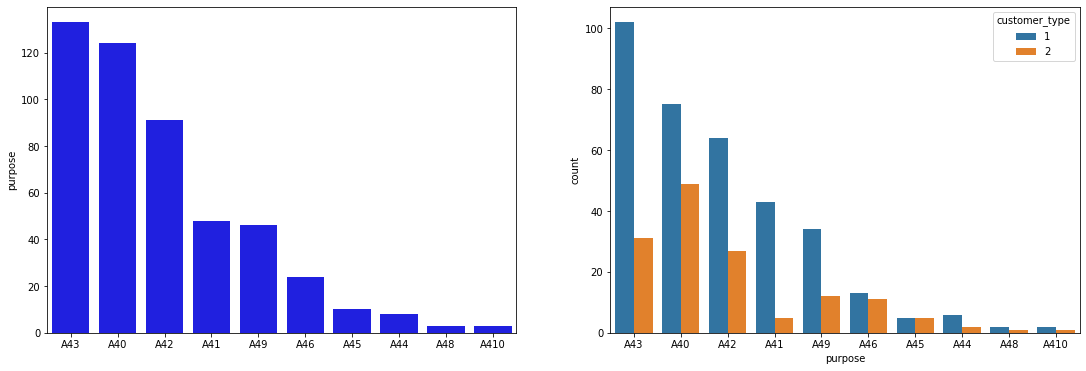

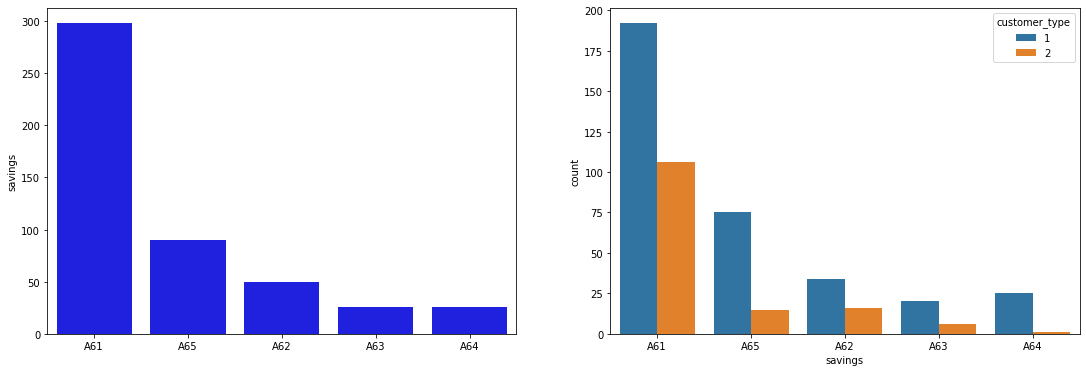

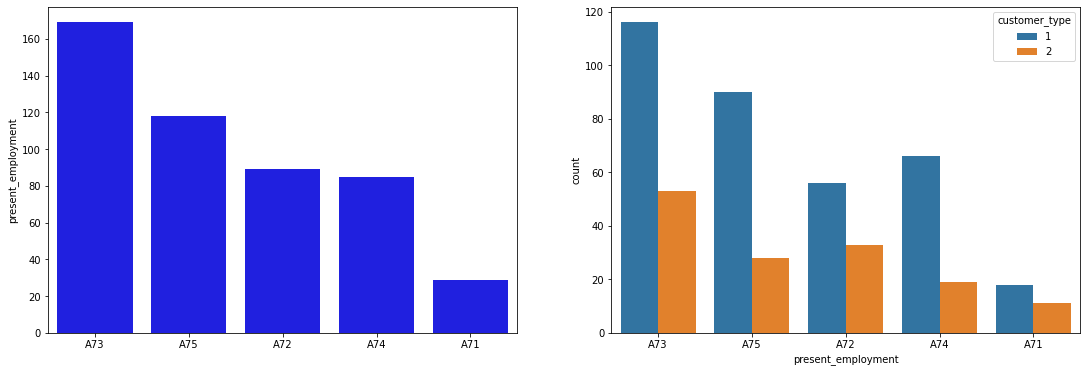

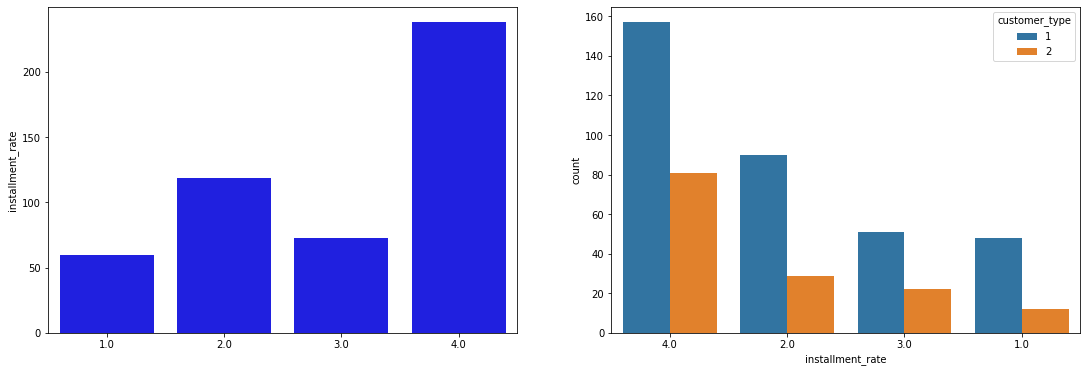

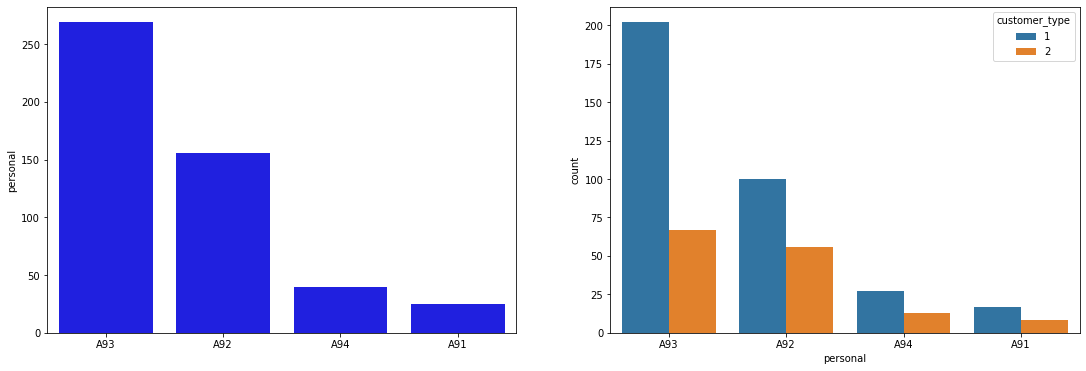

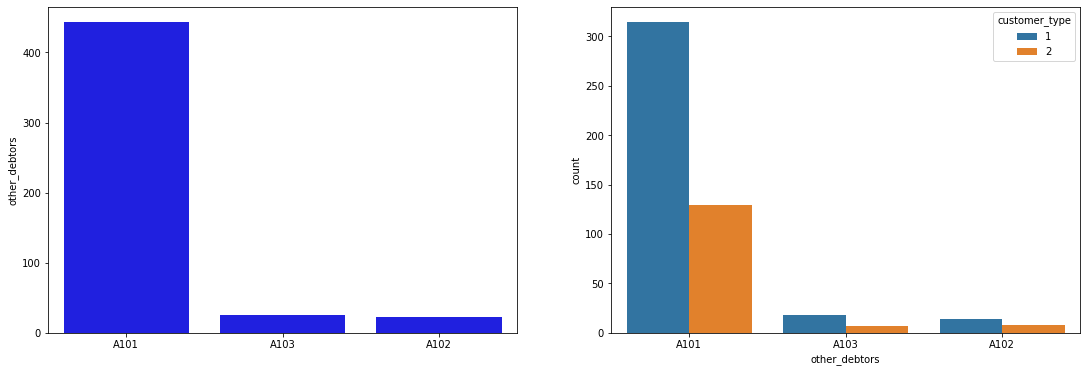

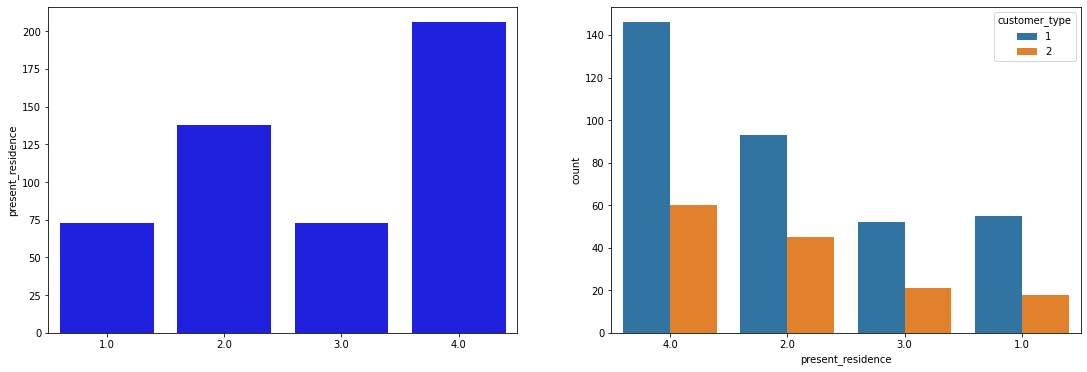

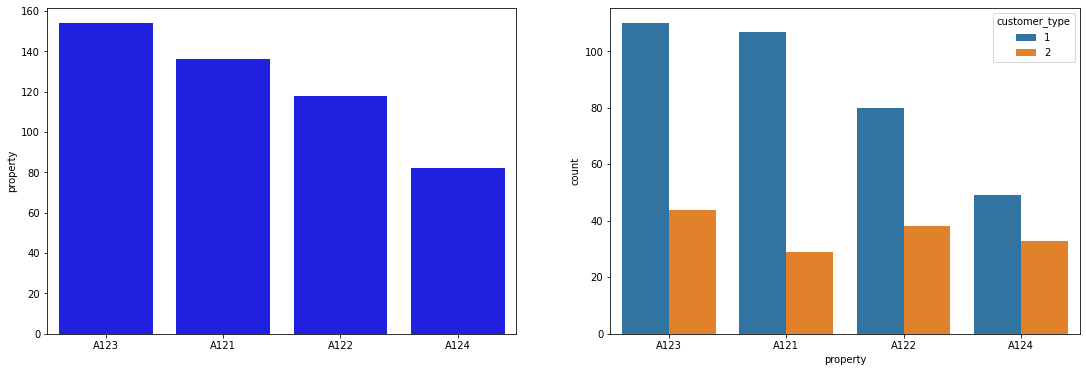

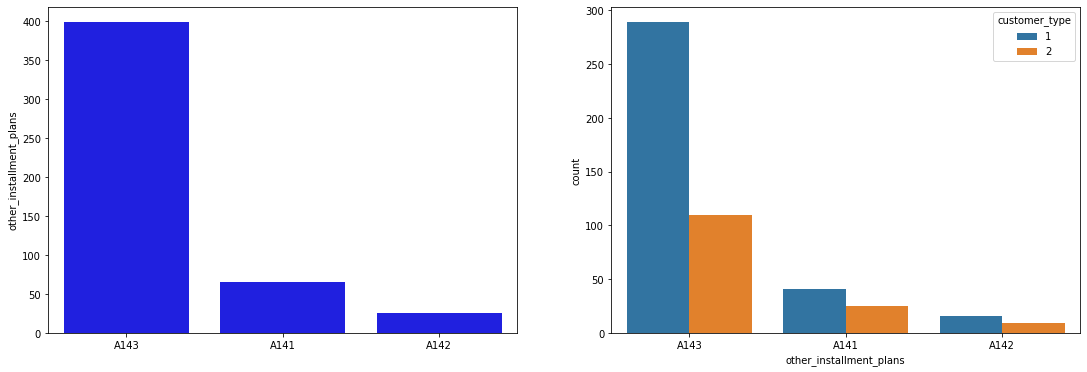

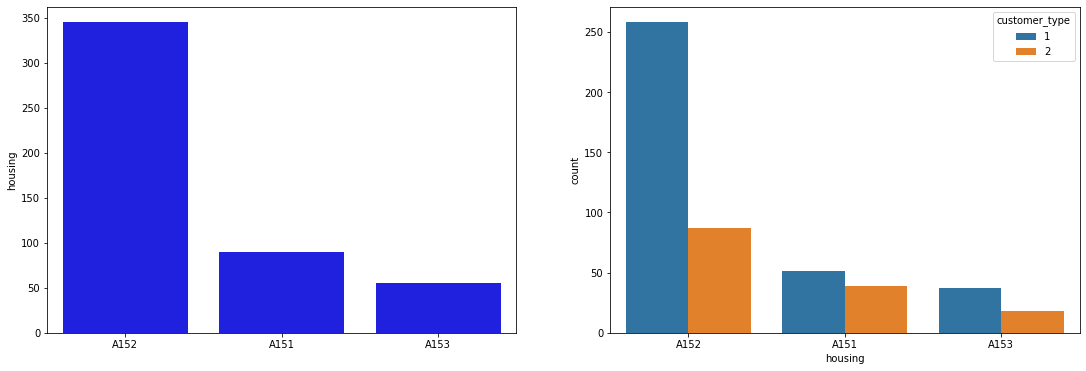

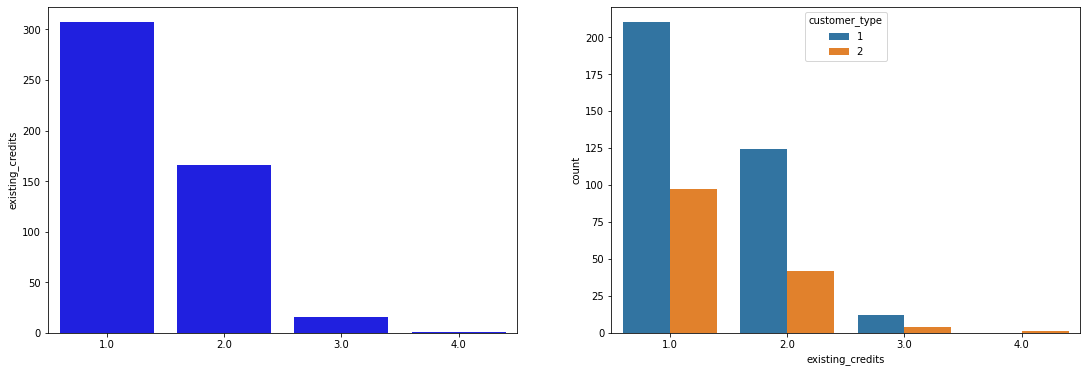

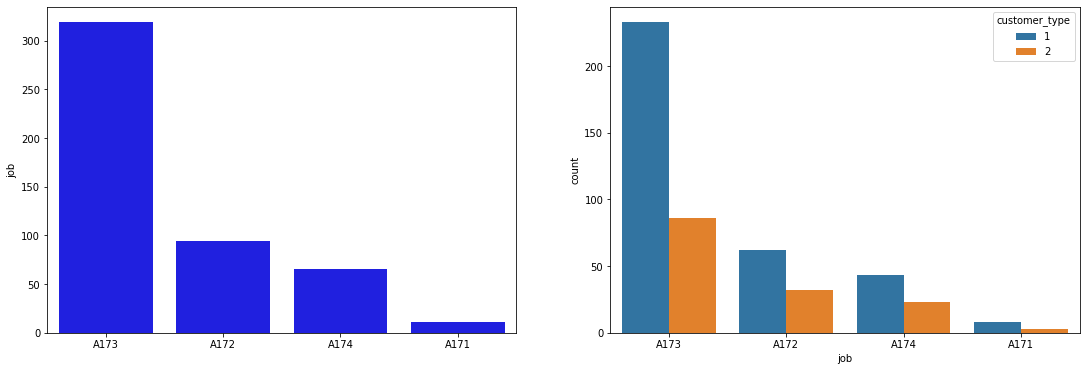

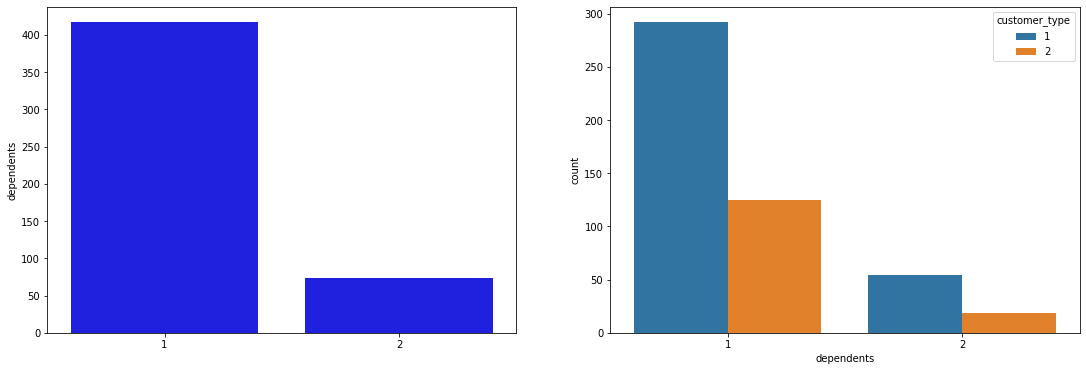

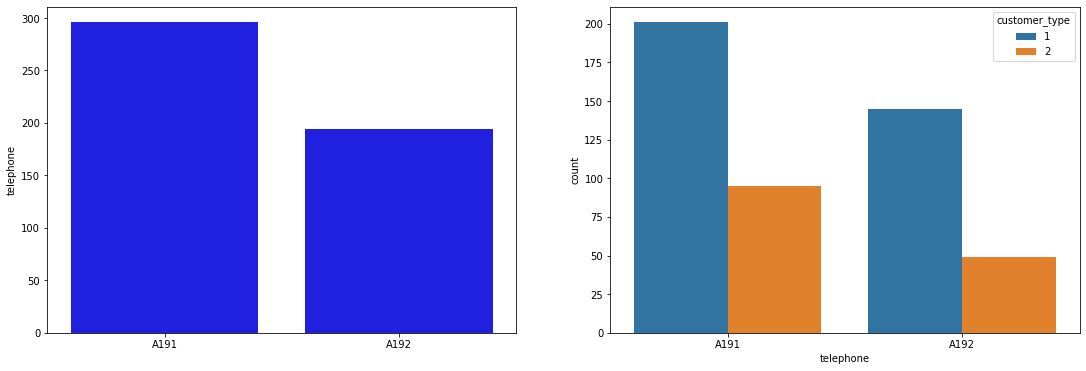

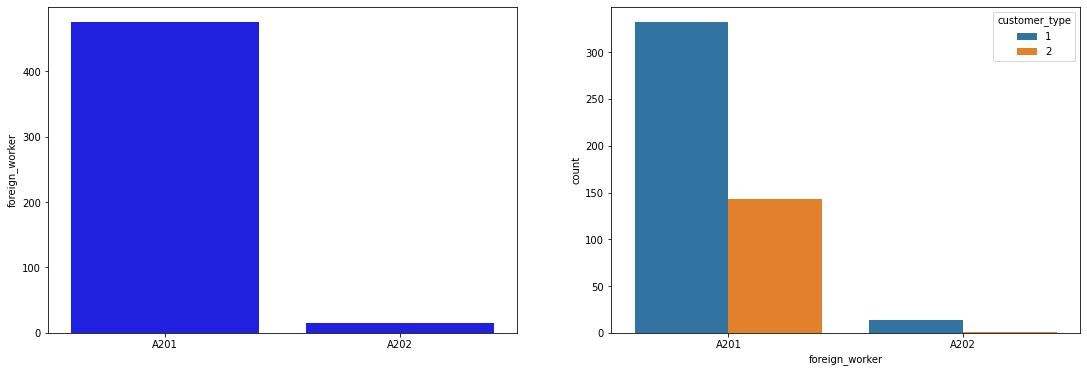

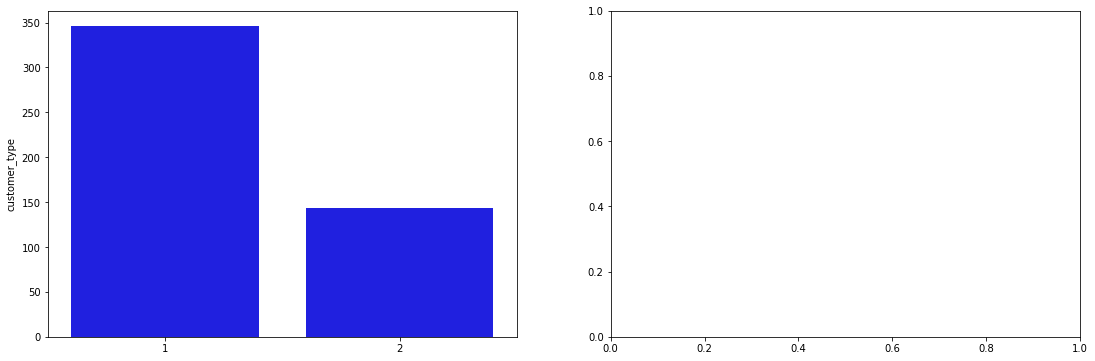

In [12]:
numeric_columns = train_df.select_dtypes(include=np.number).columns.tolist()
for i in ['installment_rate', 'existing_credits', 'dependents', 'present_residence', 'customer_type']:
    numeric_columns.remove(i)
cat_columns = [col for col in train_df.columns if col not in numeric_columns]

for col in cat_columns:
    data = train_df[col].value_counts()
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(18.5, 6)
    sns.barplot(x = data.index, y = data, color='blue', ax=ax[0])
    if col == 'customer_type': 
        plt.show()
        continue
    sns.countplot(data = train_df, x = col , hue = 'customer_type', ax=ax[1], order = data.index)
    plt.show()

<Figure size 360x360 with 0 Axes>

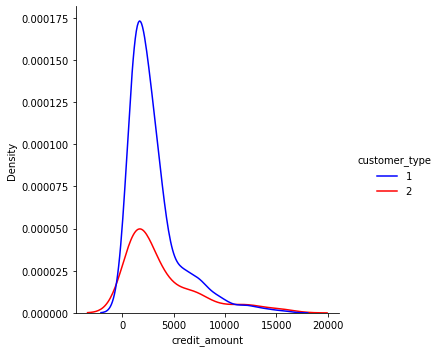

In [13]:
plt.figure(figsize=(5,5))
sns.displot(data = train_df, x = 'credit_amount', hue = 'customer_type', kind = 'kde', palette = ['blue', 'red'])
plt.show()

## Basic outliers exploration

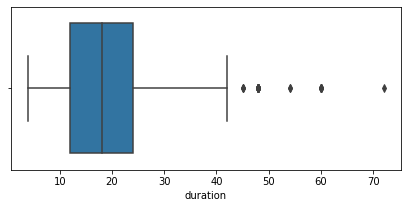

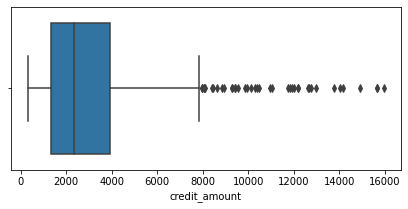

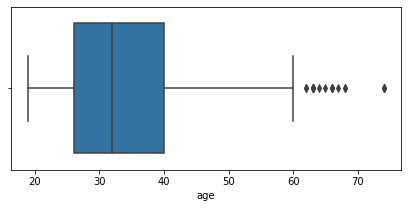

In [14]:
for col in numeric_columns:
    plt.figure(figsize=(7,3))
    sns.boxplot(data=train_df, x = col)
    plt.show()

## Correlation analysis

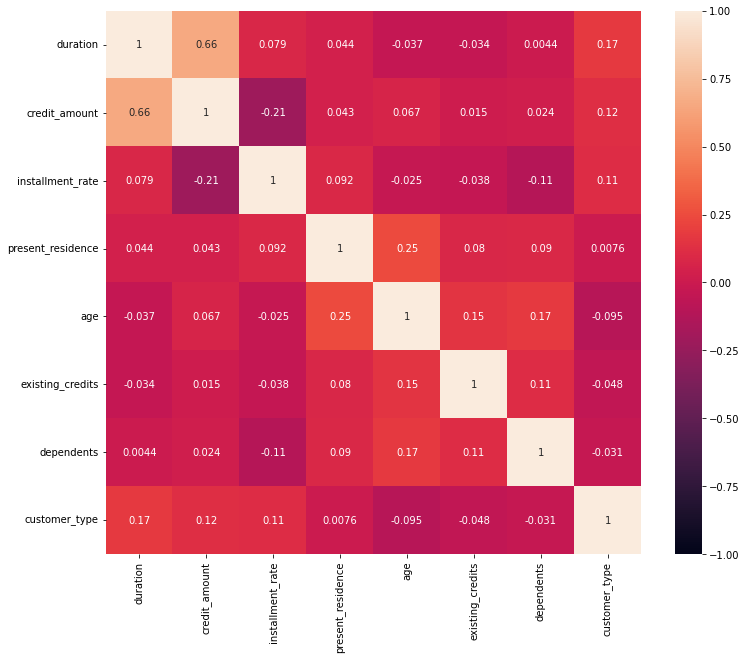

In [15]:
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(train_df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

### Credit_amount vs duration (+ consumer_type)
Only meaningful correlation (0.65)

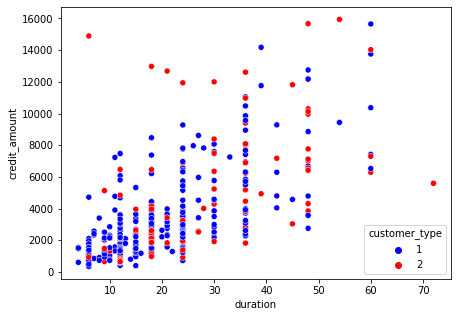

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=train_df, x='duration', y="credit_amount", hue='customer_type', palette=['blue', 'red'])
plt.show()

### Credit_amount vs Age (+ consumer_type)
Non-existent correlation (0.067)

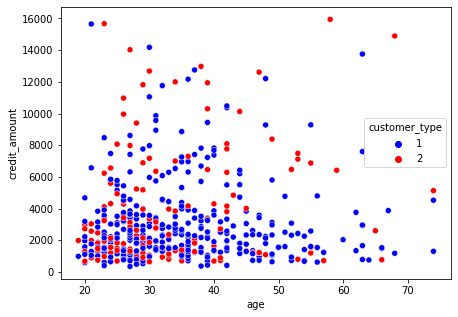

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=train_df, x='age', y="credit_amount", hue='customer_type', palette=['blue', 'red'])
plt.show()

### Average credit_amount vs purpose

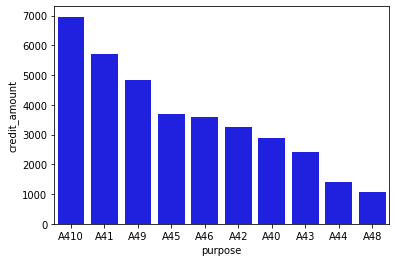

In [18]:
df = train_df[['credit_amount', 'purpose']].groupby(['purpose']).mean().sort_values(by='credit_amount', ascending = False)
data = train_df[col].value_counts()
sns.barplot(x = df.index, y = df['credit_amount'], color='blue')
plt.show()

### Purpose vs average age

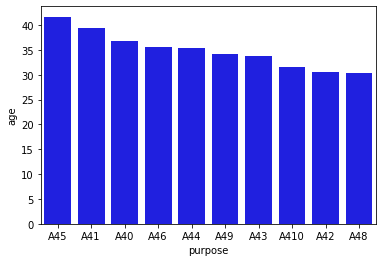

In [19]:
df = train_df[['age', 'purpose']].groupby(['purpose']).mean([]).sort_values(by='age', ascending = False)
data = train_df[col].value_counts()
sns.barplot(x = df.index, y = df['age'], color='blue')
plt.show()

## Pandas Profiling report

In [21]:
from pandas_profiling import ProfileReport
prof = ProfileReport(train_df)
# prof.to_file(output_file='eda_hw1.html')

In [22]:
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]